# Bayesian Exploration with Xopt

## TNK test function

This is the class method for running Xopt. Use Bayesian exploration to explore the input space.

TNK function
$n=2$ variables:
$x_i \in [0, \pi], i=1,2$

Objectives:
- $f_i(x) = x_i$

Constraints:
- $g_1(x) = -x_1^2 -x_2^2 + 1 + 0.1 \cos\left(16 \arctan \frac{x_1}{x_2}\right) \le 0$
- $g_2(x) = (x_1 - 1/2)^2 + (x_2-1/2)^2 \le 0.5$

In [11]:
# Import the class
from xopt import Xopt

import os
SMOKE_TEST = os.environ.get('SMOKE_TEST')

In [12]:
# To see log messages
from xopt import output_notebook
output_notebook()

The `Xopt` object can be instantiated from a JSON or YAML file, or a dict, with the proper structure.

Here we will make one

In [13]:
import yaml
# Make a proper input file. 
YAML="""
xopt: {output_path: ''}

algorithm:
  name: bayesian_exploration
  options:  
      n_initial_samples: 5
      n_steps: 25
      generator_options:                     ## options for bayesian exploration acquisition function
          batch_size: 1                      ## batch size for parallelized optimization
          #sigma: [[0.01, 0.0], [0.0,0.01]]   ## proximal biasing term
          use_gpu: False

  
simulation: 
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  
vocs:
  name: TNK_test
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: ['LESS_THAN', 0.5]
  linked_variables: {}
  constants: {a: dummy_constant}

"""
config = yaml.safe_load(YAML)

if SMOKE_TEST:
    config['algorithm']['options']['n_steps'] = 3
    config['algorithm']['options']['generator_options']['num_restarts'] = 2
    config['algorithm']['options']['generator_options']['raw_samples'] = 2

In [14]:
X = Xopt(config)
X

Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
`name` keyword no longer allowed in vocs config, removing



            Xopt 
________________________________           
Version: 0.5.0+7.g47ae31b.dirty
Configured: True
Config as YAML:
xopt: {output_path: ''}
algorithm:
  name: bayesian_exploration
  options:
    n_initial_samples: 5
    n_steps: 25
    generator_options: {batch_size: 1, use_gpu: false}
  function: xopt.bayesian.algorithms.bayesian_exploration
simulation:
  name: test_TNK
  evaluate: xopt.tests.evaluators.TNK.evaluate_TNK
  options: {extra_option: abc}
vocs:
  variables:
    x1: [0, 3.14159]
    x2: [0, 3.14159]
  objectives: {y1: None}
  constraints:
    c1: [GREATER_THAN, 0]
    c2: [LESS_THAN, 0.5]
  linked_variables: {}
  constants: {a: dummy_constant}

# Run BayesOpt

In [15]:
# Pick one of these
from concurrent.futures import ThreadPoolExecutor as PoolExecutor
#from concurrent.futures import ProcessPoolExecutor as PoolExecutor

executor = PoolExecutor()
# This will also work. 
#executor=None

In [16]:
# Change max generations
X.run(executor=executor)

Starting at time 2021-12-02T16:43:27-06:00

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x00000225D16EA820>
submitting initial candidates
starting optimization loop
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates
submitting candidates


# Plot
- plot input space samples -> yellow points satisfy constraints and purple points do not

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraint_status', 'feasibility', 'model', 'constraints', 'corrected_constraints'])


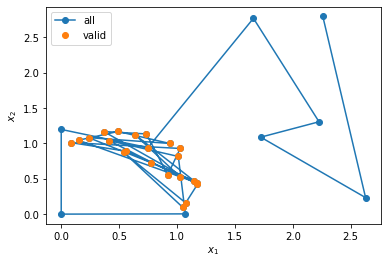

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()

results = X.results
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o', label = 'all')
ax.plot(valid[:, 0], valid[:, 1], 'o', label = 'valid')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()

plt.show()

## Use restart file
Use a restart file to run the rest of bayesian exploration.

In [18]:
config['algorithm']['options']['restart_file'] = 'results.json'
config['algorithm']['options']['n_steps'] = 25
X = Xopt(config)
X.run()

Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
Loading config from dict.
`name` keyword no longer allowed in vocs config, removing
Starting at time 2021-12-02T16:44:16-06:00

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x00000225D2705F10>


KeyError: 'variables'

# Plot
- plot input space samples -> yellow points satisfy constraints and purple points do not

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()

results = X.results
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o', label = 'all')
ax.plot(valid[:, 0], valid[:, 1], 'o', label = 'valid')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.legend()

plt.show()